# Analysis of simulation results

## Necessary imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import math

sns.set_style("whitegrid")

## Reading in the data

In [2]:
# Read in the data for the simulation runs
data_simulation_runs = pd.read_csv('./Simulation data.csv', encoding='utf8', sep=';')
data_heuristics = pd.read_csv('./Heuristic data.csv', sep=', ')

# Add a column with the number of dependent variables in a simulation run
data_simulation_runs['total_dependent'] = 36 - data_simulation_runs['total_independent'] - data_simulation_runs['total_evidence']

# Visualise head of the simulation run data
data_simulation_runs.head()

C:\Users\simon\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,hypothesis,e1,e2,e3,e4,observed_value_e1,observed_value_e2,observed_value_e3,observed_value_e4,total_evidence,total_independent,best_variable_1,best_variable_2,exp_size,total_dependent
0,ANAPHYLAXIS,EXPCO2,DISCONNECT,NaN,NaN,LOW,TRUE,NaN,NaN,2,34,NaN,NaN,NaN,0
1,ANAPHYLAXIS,PCWP,PAP,NaN,NaN,LOW,HIGH,NaN,NaN,2,34,NaN,NaN,NaN,0
2,ARTCO2,HISTORY,VENTMACH,STROKEVOLUME,VENTLUNG,FALSE,LOW,NORMAL,NORMAL,4,24,VENTALV,NaN,30.068,8
3,ARTCO2,FIO2,NaN,NaN,NaN,LOW,NaN,NaN,NaN,1,24,VENTALV,NaN,33.810,11
4,ARTCO2,MINVOLSET,EXPCO2,NaN,NaN,LOW,HIGH,NaN,NaN,2,28,VENTALV,NaN,33.000,6


## Some statistics of the simulation runs

In this section, we show some general results with respect to the simulation data. This includes a distribution of the number of MAP-dependent variables over the simulation runs, the sizes of the sets of evidence variables that were used in the simulation runs and some general statistics for the simulations with different sizes of the set evidence variables.

C:\Users\simon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


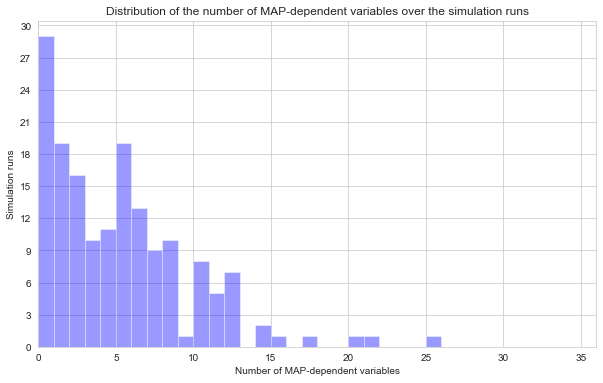

In [3]:
# Show the distribution of the number of dependent variables over the simulation runs
plt.figure(figsize=(10,6))
sns.distplot(x=data_simulation_runs["total_dependent"], hist=True,  kde = False, rug=False, bins=26, color='blue', norm_hist=False)
plt.xlabel("Number of MAP-dependent variables")
plt.ylabel("Simulation runs")
plt.title("Distribution of the number of MAP-dependent variables over the simulation runs")
plt.xlim([0,36])
plt.yticks(np.arange(0, 30+1, 3.0))
plt.show()

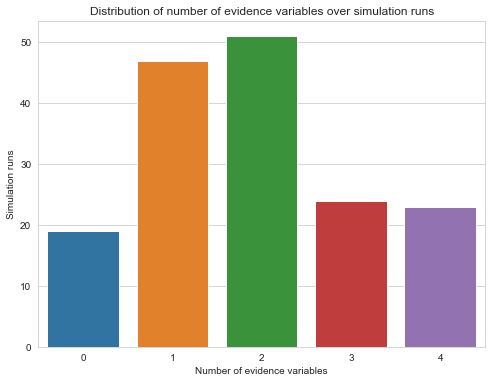

In [4]:
# Show the distribution of the number of evidence variables over the simulation runs
plt.figure(figsize=(8,6))
sns.countplot(x="total_evidence", data = data_simulation_runs)
plt.xlabel("Number of evidence variables")
plt.ylabel("Simulation runs")
plt.title("Distribution of number of evidence variables over simulation runs")
plt.show()

In [5]:
# Show the exact number of simulation runs with a particular size of the evidence set
data_simulation_runs['total_evidence'].value_counts()

2    51
1    47
3    24
4    23
0    19
Name: total_evidence, dtype: int64

In [6]:
# Get the data for the simulation runs where the size of the evidence set is x for x=0, x=1, x=2, x=3 and x=4
data_zero = data_simulation_runs[(data_simulation_runs['total_evidence'] == 0)]
data_one = data_simulation_runs[(data_simulation_runs['total_evidence'] == 1)]
data_two = data_simulation_runs[(data_simulation_runs['total_evidence'] == 2)]
data_three = data_simulation_runs[(data_simulation_runs['total_evidence'] == 3)]
data_four = data_simulation_runs[(data_simulation_runs['total_evidence'] == 4)]

# Show the statistics for the simulation runs for the different sizes of the evidence set
print('Size of the evidence set is zero:\n', data_zero.describe())
print('\nSize of the evidence set is one:\n', data_one.describe())
print('\nSize of the evidence set is two:\n', data_two.describe())
print('\nSize of the evidence set is three:\n', data_three.describe())
print('\nSize of the evidence set is four:\n', data_four.describe())

Size of the evidence set is zero:
        total_evidence  total_independent   exp_size  total_dependent
count            19.0          19.000000  13.000000        19.000000
mean              0.0          30.315789  33.291462         5.684211
std               0.0           6.446813   1.840373         6.446813
min               0.0          10.000000  29.461000         0.000000
25%               0.0          27.500000  32.816000         1.000000
50%               0.0          32.000000  34.000000         4.000000
75%               0.0          35.000000  34.810000         8.500000
max               0.0          36.000000  35.000000        26.000000

Size of the evidence set is one:
        total_evidence  total_independent   exp_size  total_dependent
count            47.0          47.000000  41.000000        47.000000
mean              1.0          28.531915  32.527439         6.468085
std               0.0           5.106905   1.274329         5.106905
min               1.0          14

## Analysis of the test-selection strategies

### Combine the data for simulation runs and the heuristics

In order to do the analysis for the test-selection strategies, we first need to combine the two datasets that we obtained from the simulation together.

In [7]:
# For the heuristics, we will only look at simulation runs where the number of dependent variables is higher than 1
data_useful = data_simulation_runs[(data_simulation_runs['total_dependent'] > 1)]

# Add an index for the simulation runs that remain, such that the dataframe can be joined with the heuristics data
data_useful['run'] = list(range(1,117))

# Combine the two dataframes into one single dataframe
data = pd.merge(data_heuristics, data_useful, how='inner', on = 'run')

# Show the head of the new dataframe
data.head()

C:\Users\simon\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,run,name,in_degree,out_degree,total_degree,distance,exp_utility,exp_gini,mutual_info,exp_independent,...,observed_value_e1,observed_value_e2,observed_value_e3,observed_value_e4,total_evidence,total_independent,best_variable_1,best_variable_2,exp_size,total_dependent
0,1,EXPCO2,2,0,2,1,0.158228,0.146654,0.410920,26.501493,...,FALSE,LOW,NORMAL,NORMAL,4,24,VENTALV,NaN,30.068,8
1,1,PVSAT,2,1,3,2,0.083298,0.064170,0.166531,26.098085,...,FALSE,LOW,NORMAL,NORMAL,4,24,VENTALV,NaN,30.068,8
2,1,SAO2,2,1,3,2,0.075569,0.050447,0.135971,24.793108,...,FALSE,LOW,NORMAL,NORMAL,4,24,VENTALV,NaN,30.068,8
3,1,SHUNT,2,1,3,3,0.070609,0.029625,0.082159,23.758269,...,FALSE,LOW,NORMAL,NORMAL,4,24,VENTALV,NaN,30.068,8
4,1,INTUBATION,0,5,5,2,0.158466,0.141561,0.325089,28.893579,...,FALSE,LOW,NORMAL,NORMAL,4,24,VENTALV,NaN,30.068,8


### Rank-approximation analysis

In this analysis, the aim is to investigate whether or not the different test-selection strategies can structurally indicate the best variable to observe. To this end, we will show in how many simulation runs the best variable to observe is included in the top one, top two and top three best variables to observe according to the test-selection strategies.

In [8]:
# Add a column which contains the ranks of a variable in comparison to other variables in the same simulation run,
# based on the expected number of MAP-independent variables when observing the variable.
ranks = []
for i in range(1, 117):
    # Get the data for the specific simulation run
    data_simulation = data[(data['run'] == i)]
    # Compute the ranks, where the variable with the highest expected number of MAP-independent variables gets the highest rank
    rank = stats.rankdata(data_simulation['exp_independent'], method='max')
    ranks.append(rank)
    
# Make a single list for all ranks in the different simulation runs
results = [el for array in ranks for el in array]

# Add a column to the dataframe containing these ranks
data['rank'] = results

In [9]:
def determineThreshold(counts, top_n, start, end, notincl = [13, 16, 18, 19, 22, 23, 24, 25]):
    '''
    This function computes the theoretical chance level for the number of simulations in which the best variable to observe
    is included in the top n results according to the heuristic. It does this based on computing the number of simulation runs
    in which the best variable to observe is included in a set of n randomly selected variables.
    
    counts: an array which specifies in how many simulation runs there were k MAP-dependent variables for all k.
    top_n : an integer specifying for which n the theoretical chance level needs to be computed.
    start : an integer specifying the minimum number of MAP-dependent variables that needs to be included in the data.
    end   : an integer specifying the maximum number of MAP-dependent variables that needs to be included in the data.
    notincl : an array specifying for which number of MAP-dependent variables there are no simulations
    '''
    # Initialise the threshold
    threshold = 0
    for i in range(start, end+1):
        # If there are simulation runs with i MAP-dependent variables, compute:
        if not i in notincl:
            # Compute the probability that the best variable to observe is included in top_n randomly selected variables
            # from i MAP-dependent variables
            prob = 1
            if i >= top_n:
                for j in range(0, top_n):
                    prob *= (i-j-1)/(i-j)
                prob = 1 - prob
            # Multiply the probability with the total number of simulation runs with i MAP-dependent variables and add this to 
            # the threshold
            threshold += prob * counts[i]  
    # Return the threshold, indicating the number of simulation runs in which the best variable is included in a randomly 
    # selected set of n variables.
    return threshold

In [10]:
def computeRankBest(data, simulations_included, max_val, strategies):
    '''
    This function computes the number of simulations in which the best variable to observe is included in the top n variables
    according to the values of the test-selection strategies. The results are computed for the top n variables ranging from 1 to max_val - 1.
    
    data       : the dataframe over which the function needs to be computed
    simulations_included : specifies the simulations to look at
    max_val    : specifies the maximum number n to see whether the best variable is included in the top n results
    strategies : the test-selection strategies for which the function needs to be computed
    '''
    
    counts_total = np.zeros((max_val, len(strategies)))
    n_exceeded = np.zeros((max_val, len(strategies)))
    # Loop over the different n.
    for i in range(0, max_val):
        # Loop over the simulation runs.
        for run in simulations_included:
            # Extract the data for the specific simulation run.
            data_simulation = data[(data['run'] == run)]
            # Identify the best variable (i.e. variable with highest expected number of MAP-independent variables).
            max_idx = data_simulation.index[data_simulation['total_dependent'] == data_simulation['rank']].tolist()
            for j, s in enumerate(strategies):
                # For each test-selection strategy, find the i highest ranked variables.
                if s == 'distance':
                    # For distance, the value of the test-selection strategy needs to be minimized.
                    max_values = data_simulation[s].nsmallest(i+1, keep='all').index.tolist()
                else:
                    # For the other test-selection strategies, the value needs to be maximized.
                    max_values = data_simulation[s].nlargest(i+1, keep='all').index.tolist()
                
                # Check whether the number of variables considered for the best variable according to the test-selection 
                # strategy is larger than n.
                if len(max_values) > i+1:
                    # If so, update the count for the number of times n is exceeded for the test-selection strategy
                    n_exceeded[i,j] += 1
                    
                # If there is only one best variable, check whether the variable is contained within the i best ranked variables
                # according to the heuristic
                if len(max_idx) == 1:
                    if max_idx[0] in max_values:
                        counts_total[i,j] += 1
                else:
                    # if there are multiple best variables, check whether one of these is contained within the i best ranked 
                    # variables according to the heuristic
                    found = False
                    for val in max_idx:
                        if val in max_values:
                            found = True
                    if found:
                        counts_total[i,j] += 1
                        
    # Return the total number of simulations in which the best variable to observe is contained within the top n best variables
    # according to the test-selection strategy, based on minimizing or maximizing the heuristic value
    # Furthermore, return the number of simulations in which n was exceeded for the test-selection strategies.
    return counts_total, n_exceeded

In [11]:
def plotRankData(counts_overall, strategies):
    '''
    This function is used to plot the bar plots for the different test-selection strategies that indicate the percentage of
    simulation runs in which the best variable to observe is contained within the top n variables according to the test-
    selection strategies.
    
    counts_overall : the number of simulation runs in which the best variable to observe is contained within the top n variables
                     according to the test-selection strategies.
    strategies     : the test-selection strategies for which the results have to be plotted.
    ''' 
    
    # Get the number of strategies for which results have to be plotted
    N, rank = counts_overall.shape
    # Make sure that the spacing between the bar plots is good
    ind = np.arange(N)
    width = 0.1
  
    # Plot the bar plots for the different test-selection strategies
    plt.figure(figsize=(7,4))
    for i in range(rank):
        plt.bar(ind+width*i, counts_overall[:,i], width, color = sns.color_palette()[i], label=strategies[i])
        
    # Add axis-labels and a title to the plot
    plt.xlabel("Top $n$ variables according to heuristic")
    plt.ylabel('% of simulations included')
    plt.title("Percentage of simulations in which the best variable to observe is\n included in the top $n$ variables according to the test-selection strategies")
  
    # Set the position of the x-labels and the limit of the y-axis.
    plt.xticks(ind+(3*width), list(range(1, N+1)))
    plt.ylim([0,100])

    # Add a legend indicating which bar plot belongs to which test-selection strategy
    plt.legend(bbox_to_anchor=(1, 0.65), fancybox=True)
    
    # Show the plot
    plt.show()

In [12]:
# Get the number of simulation runs in which there were k MAP-dependent variables for all k
counts = data_simulation_runs['total_dependent'].value_counts()

# Calculate the theoretical chance levels for the top one, top two and top three
num_dep = 2
for i in range(1, 4):
    thres = determineThreshold(counts, i, num_dep, 26)
    print('Theoretical chance level simulations for {} best variables: {}'.format(i, thres))
    print('Theoretical chance level for %simulations for {} best variables: {}'.format(i, thres/116))

Theoretical chance level simulations for 1 best variables: 24.93913210972034
Theoretical chance level for %simulations for 1 best variables: 0.21499251818724432
Theoretical chance level simulations for 2 best variables: 49.87826421944068
Theoretical chance level for %simulations for 2 best variables: 0.42998503637448865
Theoretical chance level simulations for 3 best variables: 66.81739632916104
Theoretical chance level for %simulations for 3 best variables: 0.5760120373203538


In [13]:
# Calculate the theoretical chance levels for the top one, top two and top three where the number of MAP-dependent variables
# is larger than six
num_dep = 7
for i in range(1, 4):
    thres = determineThreshold(counts, i, num_dep, 26)
    print('Theoretical chance level simulations for {} best variables: {}'.format(i, thres))
    print('Theoretical chance level for %simulations for {} best variables: {}'.format(i, thres/116))

Theoretical chance level simulations for 1 best variables: 4.889132109720344
Theoretical chance level for %simulations for 1 best variables: 0.04214769060103745
Theoretical chance level simulations for 2 best variables: 9.778264219440688
Theoretical chance level for %simulations for 2 best variables: 0.0842953812020749
Theoretical chance level simulations for 3 best variables: 14.667396329161035
Theoretical chance level for %simulations for 3 best variables: 0.12644307180311237


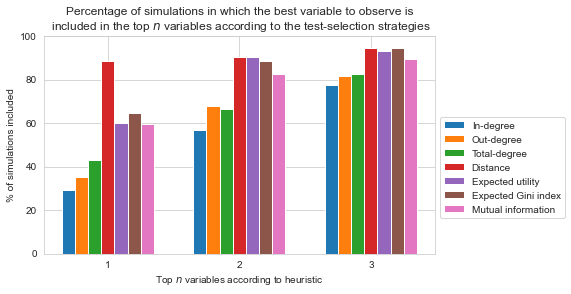

In [14]:
# Define the test-selection strategies for which to do the rank-approximation analysis
strategies = ['in_degree', 'out_degree', 'total_degree', 'distance', 'exp_utility', 'exp_gini', 'mutual_info']
strategy_names = ['In-degree', 'Out-degree', 'Total-degree', 'Distance', 'Expected utility', 'Expected Gini index', 'Mutual information']

# Get the simulations with more than one MAP-dependent variable
simulations_included = list(set(data['run'].tolist()))

# Compute the percentage of simulations in which the best variable to observe is included in the top n variables for the 
# different test-selection strategies
counts_overall_1, n_exceeded_1 = computeRankBest(data, simulations_included, 3, strategies)

# Express the counts as percentage of the total number of simulation runs.
counts_overall_1_relative = counts_overall_1 / len(simulations_included) * 100

# Plot the data for the different test-selection strategies
plotRankData(counts_overall_1_relative, strategy_names)

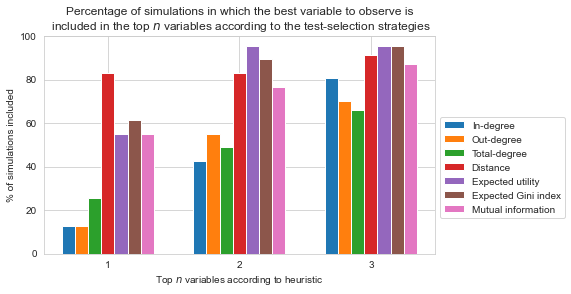

In [15]:
# Get the simulations with more than six MAP-dependent variables
data_dependent_larger_than_6 = data[(data['total_dependent'] > 6) & (data['total_dependent'] < 36)]
simulations_included_larger_than_6 = list(set(data_dependent_larger_than_6['run'].tolist()))

# Compute the percentage of simulations in which the best variable to observe is included in the top n variables for the 
# different test-selection strategies
counts_overall_6, n_exceeded_6 = computeRankBest(data_dependent_larger_than_6, simulations_included_larger_than_6, 3, strategies)

# Express the counts as percentage of the total number of simulation runs.
counts_overall_6_relative = counts_overall_6 / len(simulations_included_larger_than_6) * 100

# Plot the data for the different heuristics
plotRankData(counts_overall_6_relative, strategy_names)

In [16]:
# Print statistics for simulation runs with more than one MAP-dependent variable
print('Number of times n was exceeded in top 1, top 2 and top 3:\n', n_exceeded_1)
print('\nRelative number of times n was exceeded in top 1, top 2 and top 3:\n', n_exceeded_1/len(simulations_included))
print('\nNumber of times best variable was included:\n', counts_overall_1)
print('\nRelative number of times best variable was included:\n', counts_overall_1_relative)

Number of times n was exceeded in top 1, top 2 and top 3:
 [[34. 11. 33. 92.  4.  4.  4.]
 [60. 51. 32. 55.  6.  6.  6.]
 [66. 50. 38. 70.  0.  0.  0.]]

Relative number of times n was exceeded in top 1, top 2 and top 3:
 [[0.29310345 0.09482759 0.28448276 0.79310345 0.03448276 0.03448276
  0.03448276]
 [0.51724138 0.43965517 0.27586207 0.47413793 0.05172414 0.05172414
  0.05172414]
 [0.56896552 0.43103448 0.32758621 0.60344828 0.         0.
  0.        ]]

Number of times best variable was included:
 [[ 34.  41.  50. 103.  70.  75.  69.]
 [ 66.  79.  77. 105. 105. 103.  96.]
 [ 90.  95.  96. 110. 108. 110. 104.]]

Relative number of times best variable was included:
 [[29.31034483 35.34482759 43.10344828 88.79310345 60.34482759 64.65517241
  59.48275862]
 [56.89655172 68.10344828 66.37931034 90.51724138 90.51724138 88.79310345
  82.75862069]
 [77.5862069  81.89655172 82.75862069 94.82758621 93.10344828 94.82758621
  89.65517241]]


In [17]:
# Print statistics for simulation runs with more than six MAP-dependent variable
print('Number of times n was exceeded in top 1, top 2 and top 3:\n', n_exceeded_6)
print('\nRelative number of times n was exceeded in top 1, top 2 and top 3:\n', n_exceeded_6/len(simulations_included_larger_than_6))
print('\nNumber of times best variable was included:\n', counts_overall_6)
print('\nRelative number of times best variable was included:\n', counts_overall_6_relative)

Number of times n was exceeded in top 1, top 2 and top 3:
 [[14.  1. 16. 44.  0.  0.  0.]
 [26. 26. 18. 30.  1.  1.  1.]
 [42. 31. 23. 38.  0.  0.  0.]]

Relative number of times n was exceeded in top 1, top 2 and top 3:
 [[0.29787234 0.0212766  0.34042553 0.93617021 0.         0.
  0.        ]
 [0.55319149 0.55319149 0.38297872 0.63829787 0.0212766  0.0212766
  0.0212766 ]
 [0.89361702 0.65957447 0.4893617  0.80851064 0.         0.
  0.        ]]

Number of times best variable was included:
 [[ 6.  6. 12. 39. 26. 29. 26.]
 [20. 26. 23. 39. 45. 42. 36.]
 [38. 33. 31. 43. 45. 45. 41.]]

Relative number of times best variable was included:
 [[12.76595745 12.76595745 25.53191489 82.9787234  55.31914894 61.70212766
  55.31914894]
 [42.55319149 55.31914894 48.93617021 82.9787234  95.74468085 89.36170213
  76.59574468]
 [80.85106383 70.21276596 65.95744681 91.4893617  95.74468085 95.74468085
  87.23404255]]


### Value-approximation analysis

In this analysis, the aim is to investigate whether the values of the test-selection strategies correlate with the expected number of MAP-dependent variables. To this end, we use linear regression to see how well the models fit the data.

In [18]:
## Log-transform the expected utility, expected Gini index and mutual information in order to get a more linear relationship
# with the expected number of dependent variables
data['exp_utility_log'] = np.log(data['exp_utility'])
data['exp_gini_log'] = np.log(data['exp_gini'])
data['mutual_info_log'] = np.log(data['mutual_info'])

# Initialise a row for the number of dependent variables. 
# This should be: nr of vars in the network - hyp var - evidence vars - exp nr of indep vars
# i.e. (37 - 1) - evidence vars - exp nr of indep vars
data['exp_dependent'] = 36 - data['total_evidence'] - data['exp_independent']
data.head()

,run,name,in_degree,out_degree,total_degree,distance,exp_utility,exp_gini,mutual_info,exp_independent,...,total_independent,best_variable_1,best_variable_2,exp_size,total_dependent,rank,exp_utility_log,exp_gini_log,mutual_info_log,exp_dependent
0,1,EXPCO2,2,0,2,1,0.158228,0.146654,0.410920,26.501493,...,24,VENTALV,NaN,30.068,8,6,-1.843721,-1.919678,-0.889357,5.498507
1,1,PVSAT,2,1,3,2,0.083298,0.064170,0.166531,26.098085,...,24,VENTALV,NaN,30.068,8,5,-2.485330,-2.746215,-1.792576,5.901915
2,1,SAO2,2,1,3,2,0.075569,0.050447,0.135971,24.793108,...,24,VENTALV,NaN,30.068,8,3,-2.582715,-2.986827,-1.995317,7.206892
3,1,SHUNT,2,1,3,3,0.070609,0.029625,0.082159,23.758269,...,24,VENTALV,NaN,30.068,8,2,-2.650605,-3.519125,-2.499104,8.241731
4,1,INTUBATION,0,5,5,2,0.158466,0.141561,0.325089,28.893579,...,24,VENTALV,NaN,30.068,8,7,-1.842213,-1.955028,-1.123657,3.106421


In [19]:
def showAssumptions(v1, v2, data, label1, label2):
    '''
    This function checks whether the assumptions in order to do linear regression are met for a dependent variable v1 and
    an independent variable v2.
    
    v1 : dependent variable
    v2 : independent variable
    data: simulation data that needs to be considered
    label1: the label for the dependent variable (relevant for plotting)
    label2: the label for the independent variable (relevant for plotting)
    '''
    
    # Fit a OLS linear regression model
    formula_string = "{} ~ {} + {} * {}".format(v1, v2, v2, v2)
    model = sm.formula.ols(formula = formula_string, data = data)
    model_fit = model.fit()
    # Print the summary statistics of the model
    print(model_fit.summary())
    
    # Make a formula that expresses the relation between the two variables
    formula = data[v2] * model_fit.params[1] + model_fit.params[0]
    fig, ax = plt.subplots(2,2, figsize=(20,16))
    
    # Plot the data and the line relation between the variables. This should be somewhat linear.
    sns.scatterplot(data=data, x= v2, y= v1, label=label1, ax=ax[0,0])
    sns.lineplot(x= data[v2], y = formula, label= "Predicted {}".format(label1.lower()), ax=ax[0,0])
    ax[0,0].set_title("Association between {} and {}".format(label2.lower(), label1.lower()))
    ax[0,0].set_xlabel(label2)
    ax[0,0].set_ylabel(label1)
    
    # Plot the variable against the residuals. This should show a linear trend. The variability should be constant.
    residScore = data[v1] - formula
    sns.residplot(data[v2], y = residScore, ax=ax[0,1])
    ax[0,1].set_title("Plot of {} against residual scores".format(label2.lower()))
    ax[0,1].set_xlabel(label2)
    ax[0,1].set_ylabel("Residual score")
    
    # Plot the distribution over the residuals. This should be normally distributed.
    sns.distplot(residScore, bins = 20, ax=ax[1,0])
    ax[1,0].set_title("Distribution of residual values")
    ax[1,0].set_xlabel("Residual values")
    ax[1,0].set_ylabel("Frequency")

    # Plot a QQ-plot. This should show a somewhat straight line
    stats.probplot(x= residScore, dist = 'norm', fit = 'true', plot=ax[1,1])
    ax[1,1].set_title("QQ-plot of residual scores")
    ax[1,1].set_ylabel("Residual values")
    
    # Show the plots in a single figure
    plt.show()

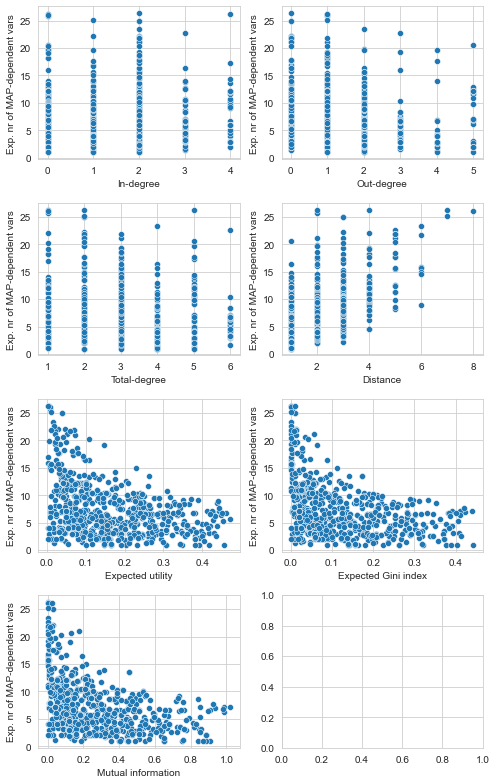

In [20]:
# Show plots of the test-selection strategies against the size of the set of independent variables
adapted_strategies = ['in_degree', 'out_degree', 'total_degree', 'distance', 'exp_utility_log', 'exp_gini_log', 'mutual_info_log']

# Make a figure with 7 plots for the different test-selection strategies
fig, ax = plt.subplots(4, 2, figsize=(7, 11))

# Iterate through the test-selection strategies and sizes
for i, h in enumerate(strategies):
    # Plot the data
    sns.scatterplot(data=data, x=h, y='exp_dependent', ax=ax[int(i/2),i%2])
    # Set the labels and title
    ax[int(i/2),i%2].set_xlabel(strategy_names[i])
    ax[int(i/2),i%2].set_ylabel('Exp. nr of MAP-dependent vars')

# Show the plot
plt.tight_layout()
plt.show()

                            OLS Regression Results                            
Dep. Variable:          exp_dependent   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.107
Date:                Tue, 07 Jun 2022   Prob (F-statistic):              0.293
Time:                        16:27:37   Log-Likelihood:                -2315.4
No. Observations:                 777   AIC:                             4635.
Df Residuals:                     775   BIC:                             4644.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4916      0.310     24.128      0.0

C:\Users\simon\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\simon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


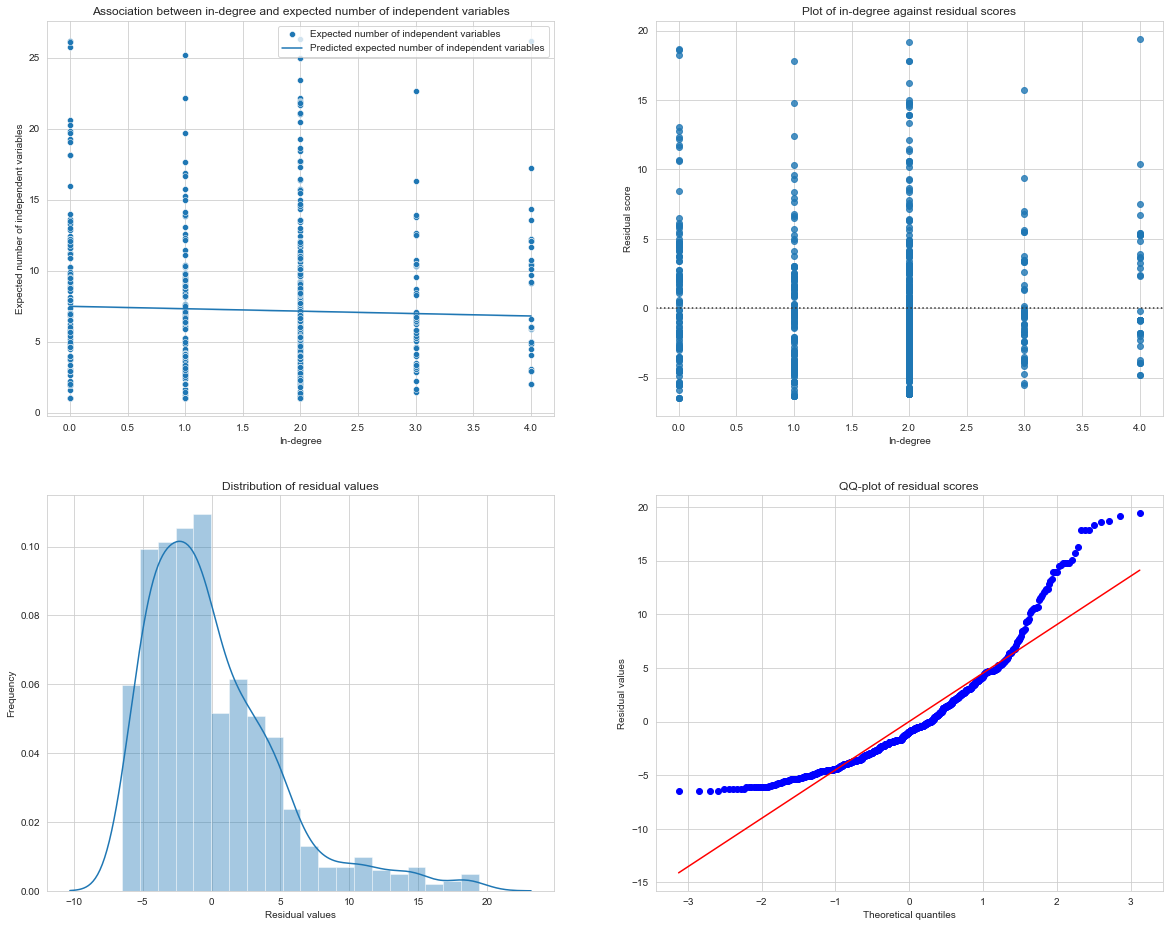

The Pearson correlation between the expected number of MAP-dependent variables and In-degree : (-0.037767708903267916, 0.2930544635582928)
                            OLS Regression Results                            
Dep. Variable:          exp_dependent   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     10.62
Date:                Tue, 07 Jun 2022   Prob (F-statistic):            0.00117
Time:                        16:27:38   Log-Likelihood:                -2310.7
No. Observations:                 777   AIC:                             4625.
Df Residuals:                     775   BIC:                             4635.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025     

C:\Users\simon\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\simon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


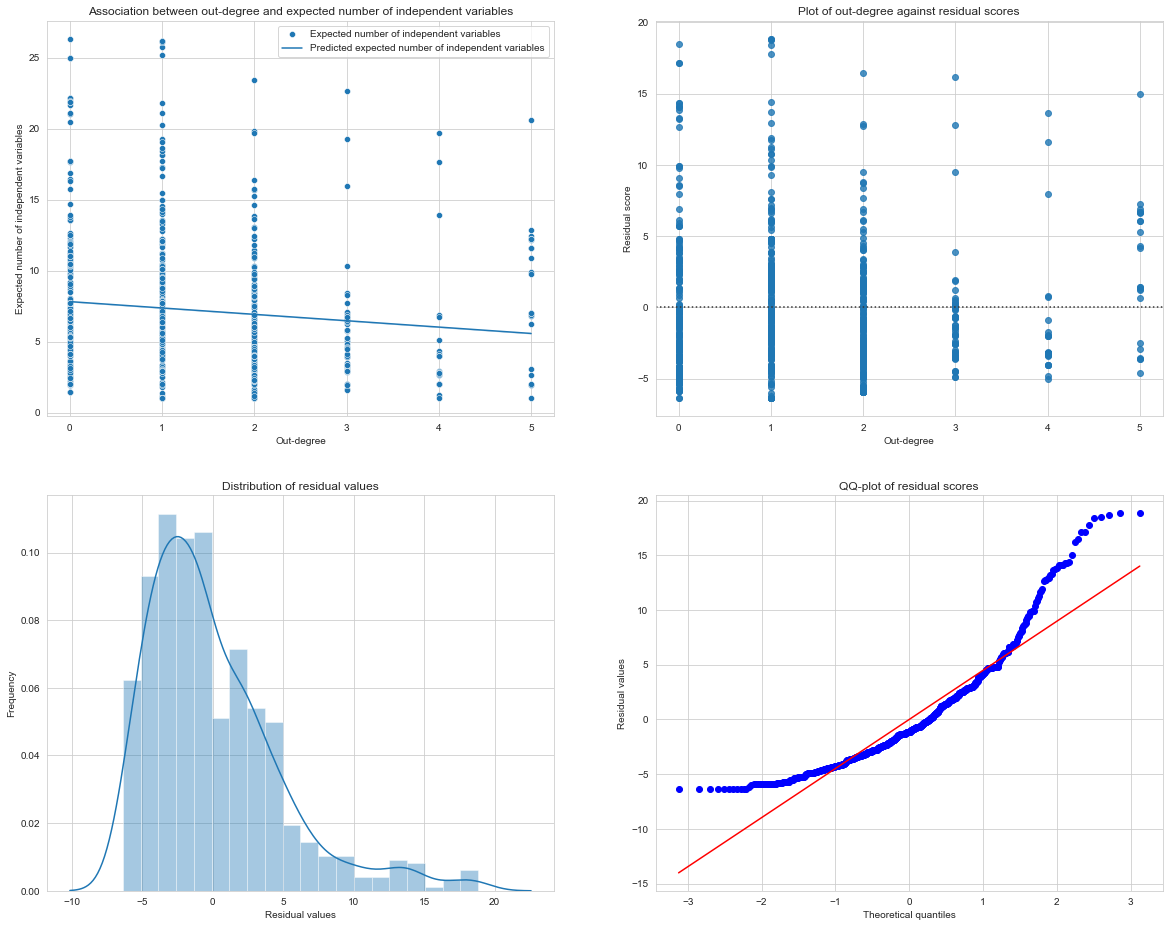

The Pearson correlation between the expected number of MAP-dependent variables and Out-degree : (-0.1162435913617651, 0.0011701777566043739)
                            OLS Regression Results                            
Dep. Variable:          exp_dependent   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     14.07
Date:                Tue, 07 Jun 2022   Prob (F-statistic):           0.000190
Time:                        16:27:39   Log-Likelihood:                -2309.0
No. Observations:                 777   AIC:                             4622.
Df Residuals:                     775   BIC:                             4631.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025 

C:\Users\simon\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\simon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


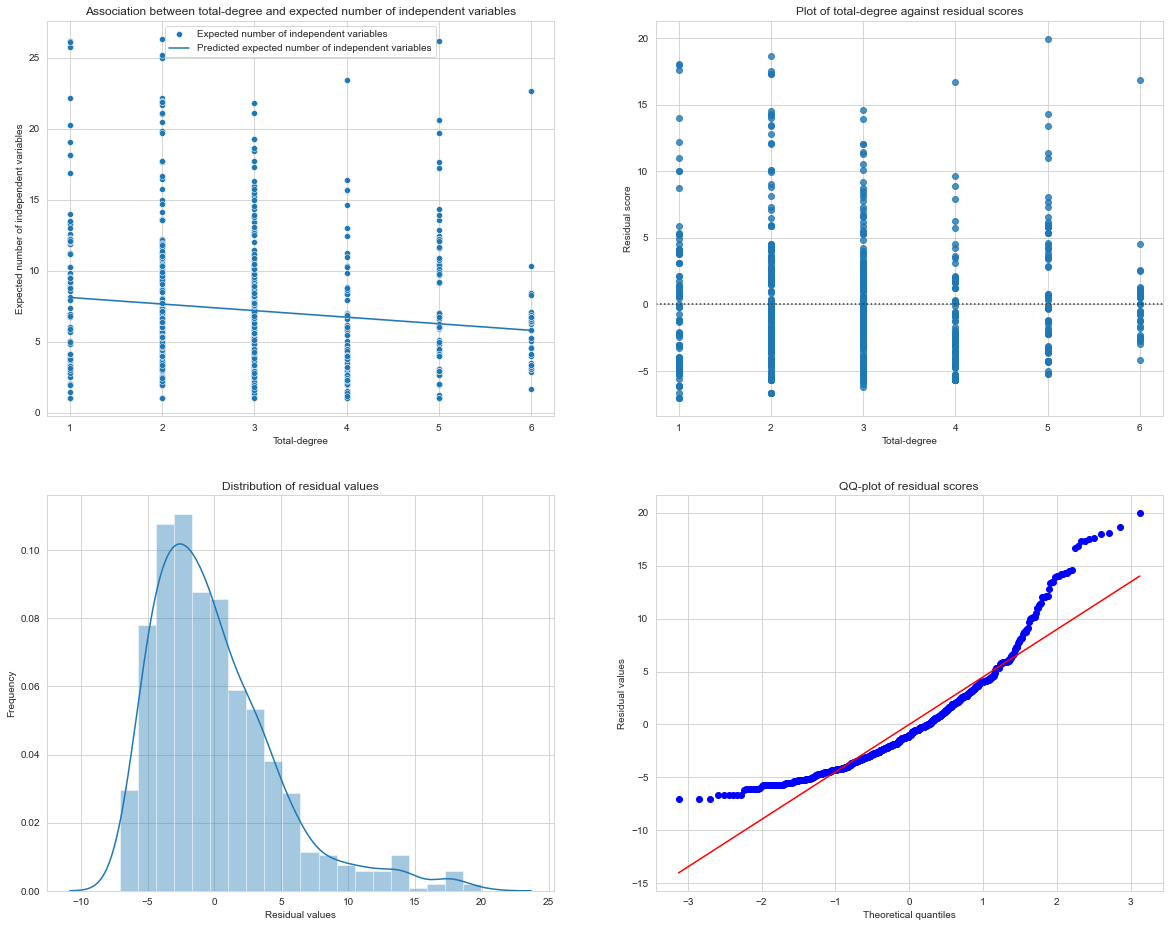

The Pearson correlation between the expected number of MAP-dependent variables and Total-degree : (-0.1335117128882935, 0.00018971547305815173)
                            OLS Regression Results                            
Dep. Variable:          exp_dependent   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     420.4
Date:                Tue, 07 Jun 2022   Prob (F-statistic):           5.63e-75
Time:                        16:27:40   Log-Likelihood:                -2147.6
No. Observations:                 777   AIC:                             4299.
Df Residuals:                     775   BIC:                             4308.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025

C:\Users\simon\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\simon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


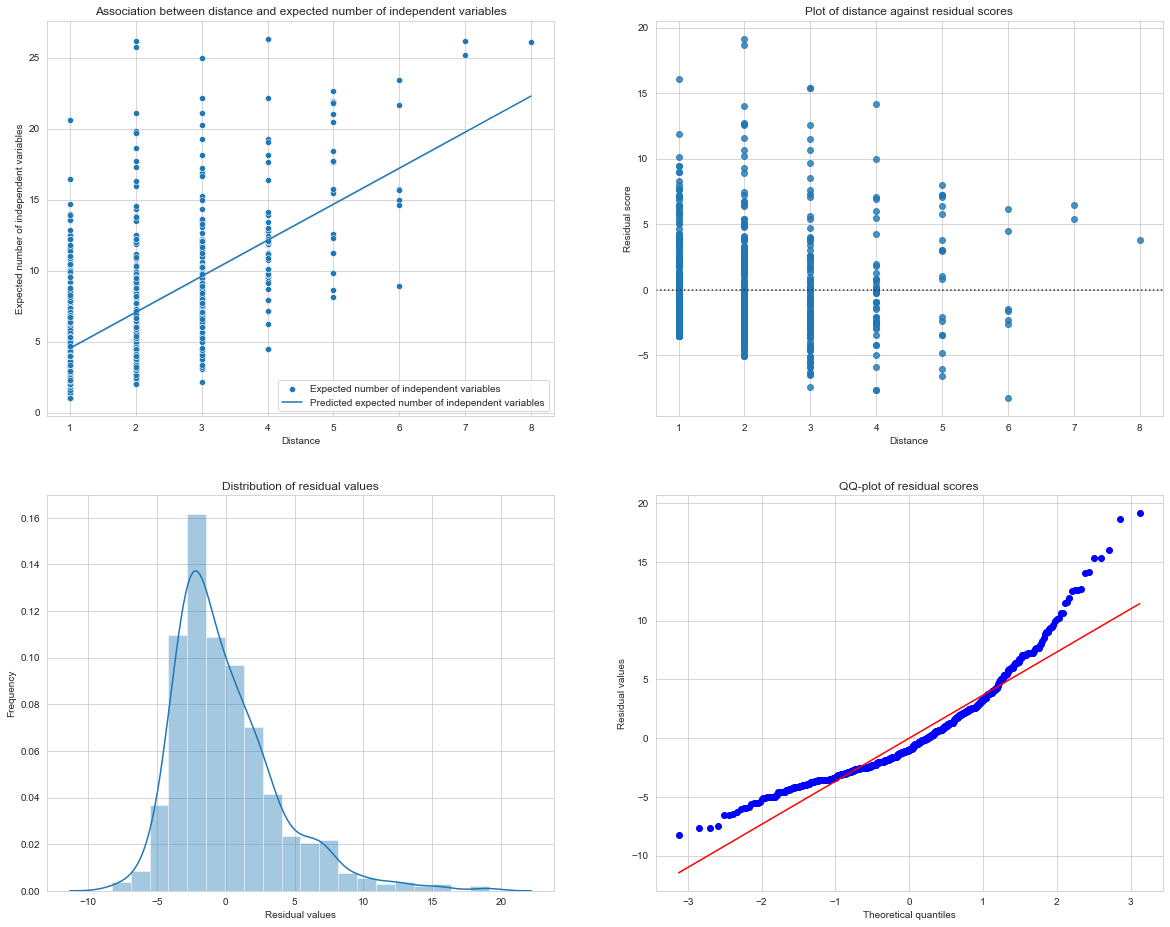

The Pearson correlation between the expected number of MAP-dependent variables and Distance : (0.5930282785517924, 5.633654828388355e-75)
                            OLS Regression Results                            
Dep. Variable:          exp_dependent   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     180.7
Date:                Tue, 07 Jun 2022   Prob (F-statistic):           3.48e-37
Time:                        16:27:41   Log-Likelihood:                -2234.5
No. Observations:                 777   AIC:                             4473.
Df Residuals:                     775   BIC:                             4482.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025 

C:\Users\simon\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\simon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


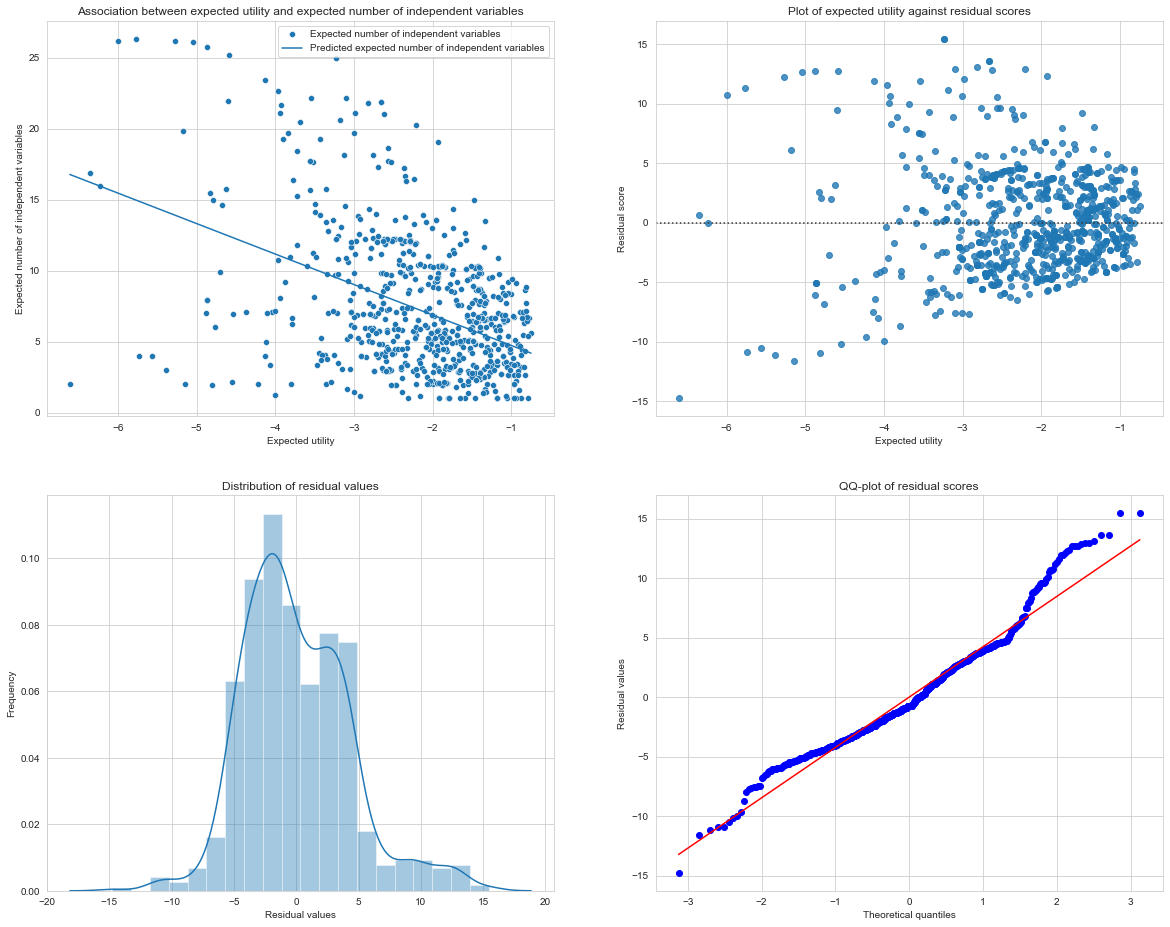

The Pearson correlation between the expected number of MAP-dependent variables and Expected utility : (-0.4348576536089448, 3.47553393831416e-37)
                            OLS Regression Results                            
Dep. Variable:          exp_dependent   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     366.0
Date:                Tue, 07 Jun 2022   Prob (F-statistic):           4.09e-67
Time:                        16:27:43   Log-Likelihood:                -2165.7
No. Observations:                 777   AIC:                             4335.
Df Residuals:                     775   BIC:                             4345.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0

C:\Users\simon\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\simon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


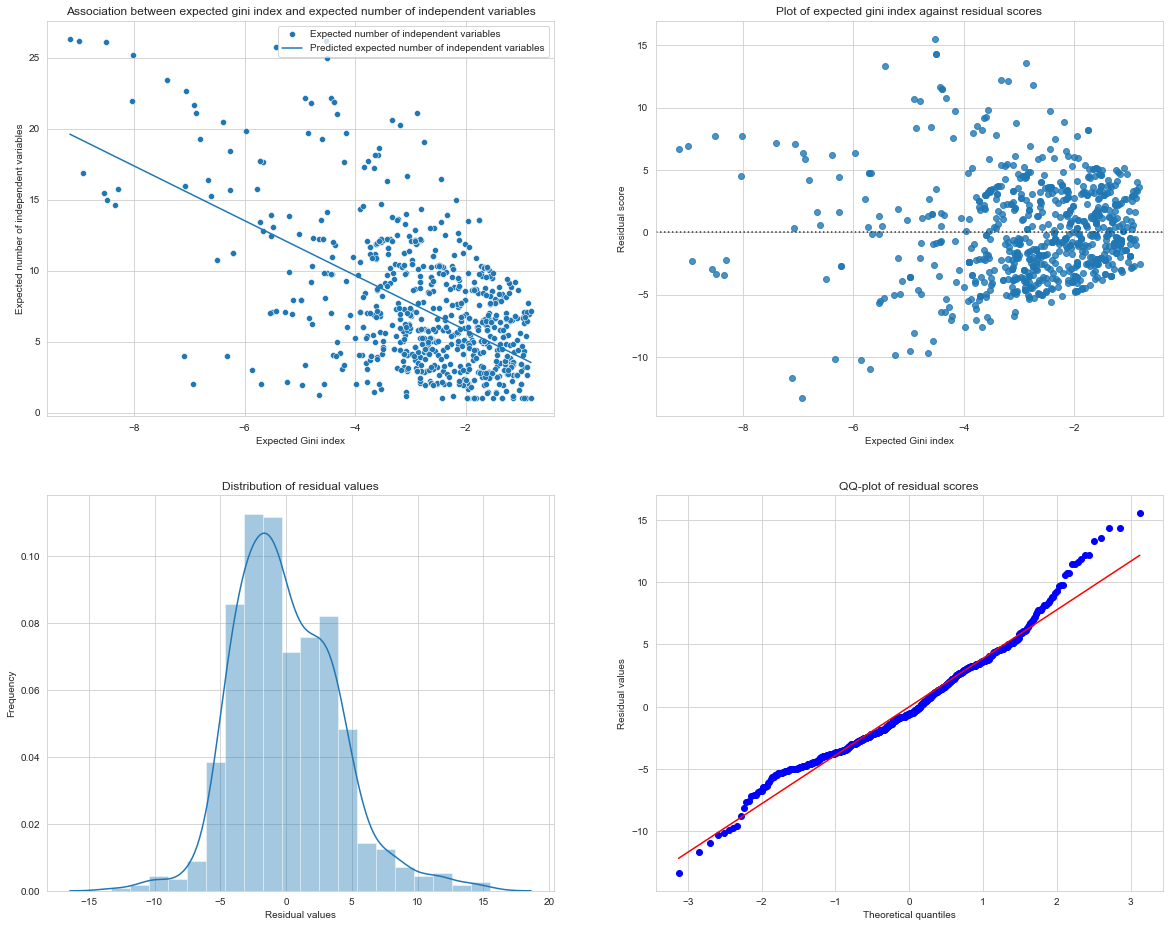

The Pearson correlation between the expected number of MAP-dependent variables and Expected Gini index : (-0.5663572165463597, 4.090445351008321e-67)
                            OLS Regression Results                            
Dep. Variable:          exp_dependent   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     417.6
Date:                Tue, 07 Jun 2022   Prob (F-statistic):           2.03e-74
Time:                        16:27:44   Log-Likelihood:                -2123.6
No. Observations:                 768   AIC:                             4251.
Df Residuals:                     766   BIC:                             4260.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t| 

C:\Users\simon\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\simon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


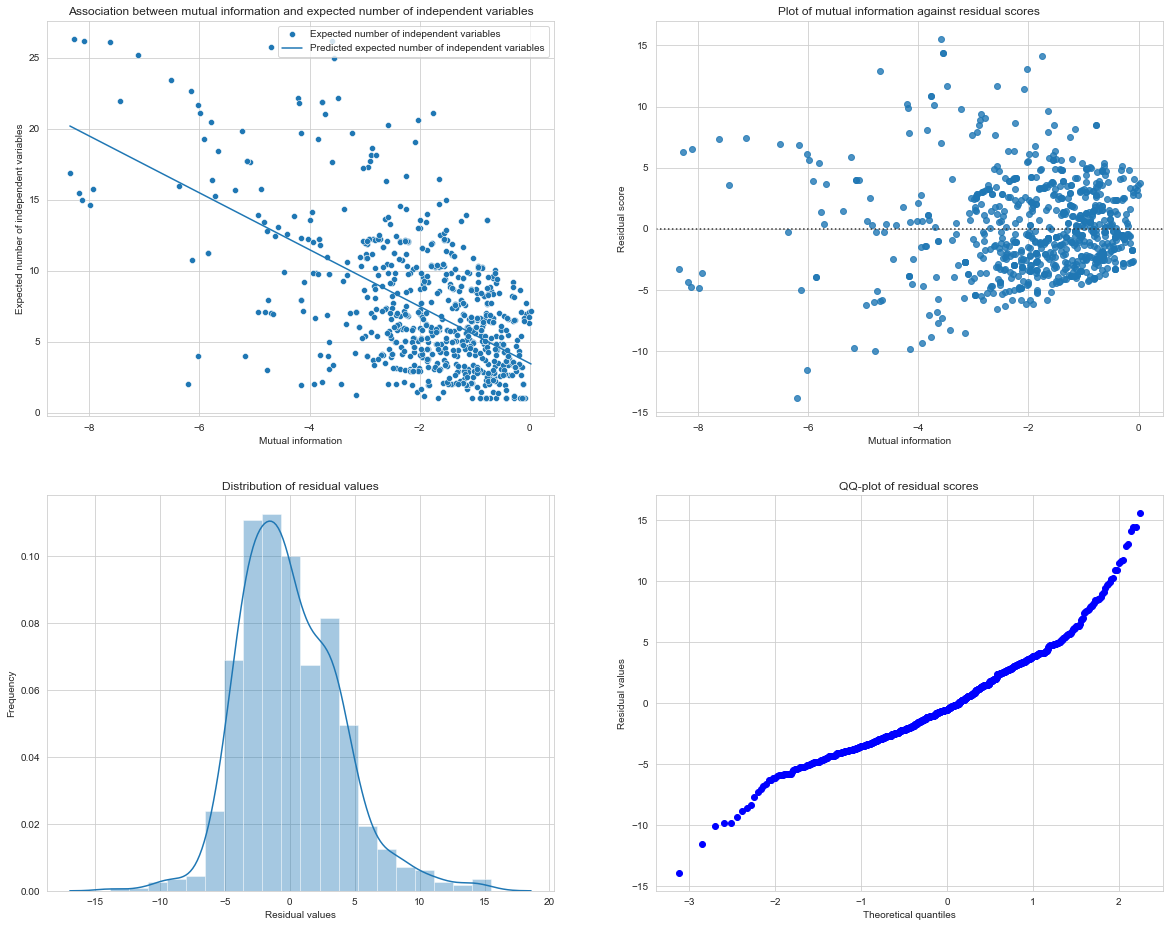

The Pearson correlation between the expected number of MAP-dependent variables and Mutual information : (-0.5917236801388367, 1.4206039786924932e-74)


In [21]:
# Check the assumptions for using linear regression and show the regression model statistics for each test-selection strategy
for i, h in enumerate(adapted_strategies):
    showAssumptions('exp_dependent', h, data, 'Expected number of independent variables', strategy_names[i])
    # Print the correlation between the expected number of MAP-dependent variables and the test-selection strategy values
    print("The Pearson correlation between the expected number of MAP-dependent variables and {} : {}".format(strategy_names[i], stats.pearsonr(data['exp_dependent'], data[h].fillna(data[h].mean()))))

In [22]:
## Log-transform the expected utility, expected Gini index and mutual information in order to get a more linear relationship
# with the expected number of dependent variables for the data with more than six MAP-dependent variables
data_dependent_larger_than_6['exp_utility_log'] = np.log(data_dependent_larger_than_6['exp_utility'])
data_dependent_larger_than_6['exp_gini_log'] = np.log(data_dependent_larger_than_6['exp_gini'])
data_dependent_larger_than_6['mutual_info_log'] = np.log(data_dependent_larger_than_6['mutual_info'])

# Initialise a row for the number of dependent variables. 
data_dependent_larger_than_6['exp_dependent'] = 36 - data_dependent_larger_than_6['total_evidence'] - data_dependent_larger_than_6['exp_independent']
data_dependent_larger_than_6.head()

C:\Users\simon\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\simon\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\simon\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,run,name,in_degree,out_degree,total_degree,distance,exp_utility,exp_gini,mutual_info,exp_independent,...,total_independent,best_variable_1,best_variable_2,exp_size,total_dependent,rank,exp_utility_log,exp_gini_log,mutual_info_log,exp_dependent
0,1,EXPCO2,2,0,2,1,0.158228,0.146654,0.410920,26.501493,...,24,VENTALV,NaN,30.068,8,6,-1.843721,-1.919678,-0.889357,5.498507
1,1,PVSAT,2,1,3,2,0.083298,0.064170,0.166531,26.098085,...,24,VENTALV,NaN,30.068,8,5,-2.485330,-2.746215,-1.792576,5.901915
2,1,SAO2,2,1,3,2,0.075569,0.050447,0.135971,24.793108,...,24,VENTALV,NaN,30.068,8,3,-2.582715,-2.986827,-1.995317,7.206892
3,1,SHUNT,2,1,3,3,0.070609,0.029625,0.082159,23.758269,...,24,VENTALV,NaN,30.068,8,2,-2.650605,-3.519125,-2.499104,8.241731
4,1,INTUBATION,0,5,5,2,0.158466,0.141561,0.325089,28.893579,...,24,VENTALV,NaN,30.068,8,7,-1.842213,-1.955028,-1.123657,3.106421


                            OLS Regression Results                            
Dep. Variable:          exp_dependent   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     4.999
Date:                Tue, 07 Jun 2022   Prob (F-statistic):             0.0258
Time:                        16:27:46   Log-Likelihood:                -1489.1
No. Observations:                 498   AIC:                             2982.
Df Residuals:                     496   BIC:                             2991.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9205      0.399     24.860      0.0

C:\Users\simon\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\simon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


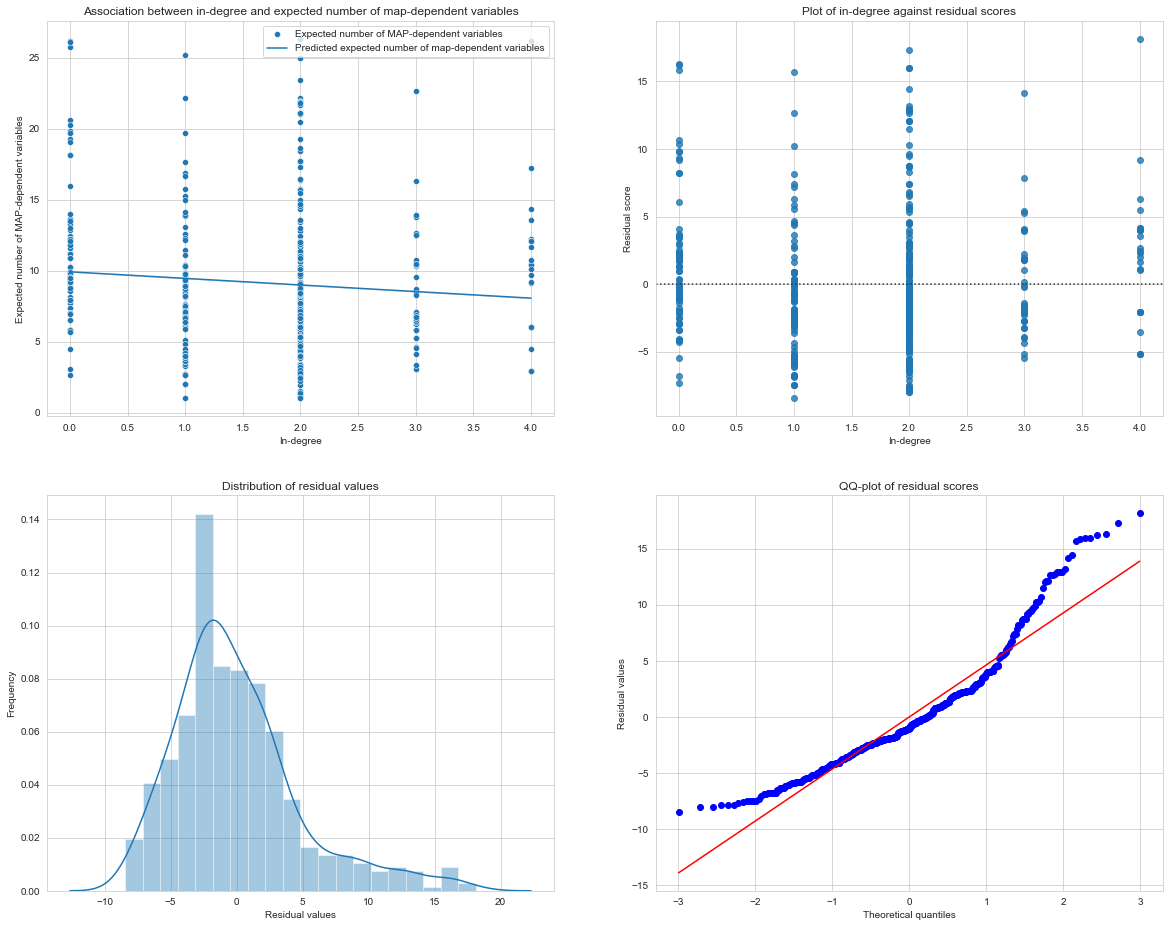

The Pearson correlation between the expected number of MAP-dependent variables and In-degree : (-0.09989261640153592, 0.025802507365670715)
                            OLS Regression Results                            
Dep. Variable:          exp_dependent   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     9.182
Date:                Tue, 07 Jun 2022   Prob (F-statistic):            0.00257
Time:                        16:27:47   Log-Likelihood:                -1487.0
No. Observations:                 498   AIC:                             2978.
Df Residuals:                     496   BIC:                             2986.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    

C:\Users\simon\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\simon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


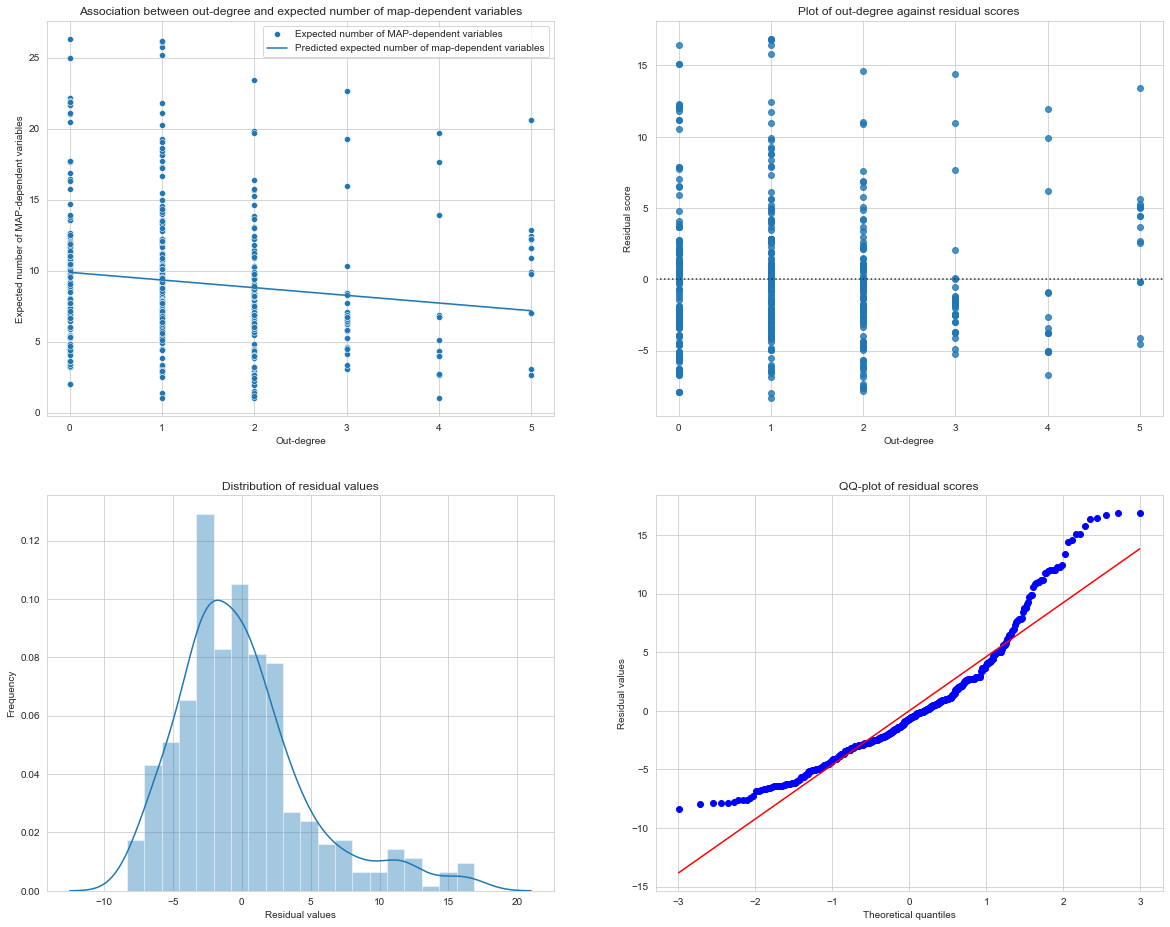

The Pearson correlation between the expected number of MAP-dependent variables and Out-degree : (-0.13481392950200155, 0.002572255854082528)
                            OLS Regression Results                            
Dep. Variable:          exp_dependent   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     19.47
Date:                Tue, 07 Jun 2022   Prob (F-statistic):           1.25e-05
Time:                        16:27:48   Log-Likelihood:                -1482.0
No. Observations:                 498   AIC:                             2968.
Df Residuals:                     496   BIC:                             2976.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025 

C:\Users\simon\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\simon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


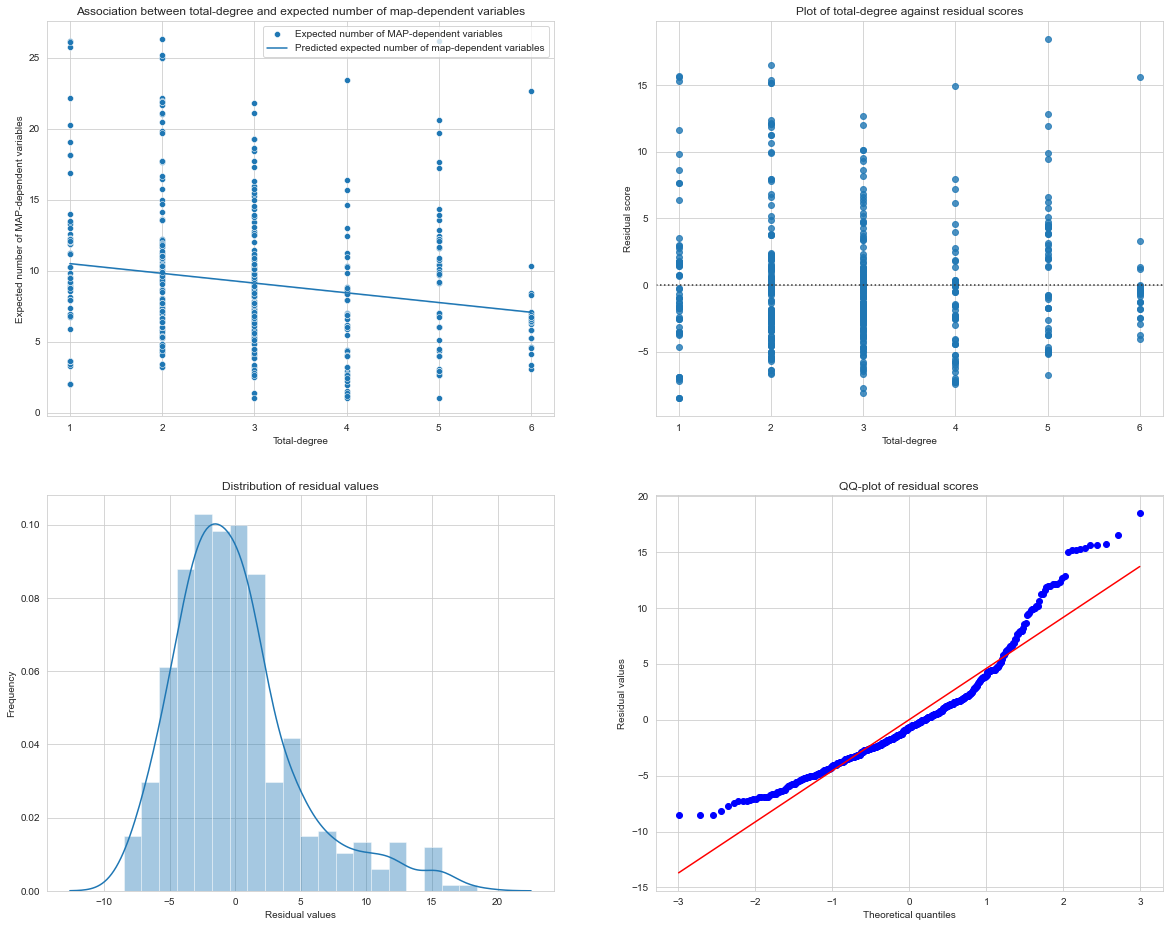

The Pearson correlation between the expected number of MAP-dependent variables and Total-degree : (-0.1943611663812878, 1.252909459414331e-05)
                            OLS Regression Results                            
Dep. Variable:          exp_dependent   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     213.7
Date:                Tue, 07 Jun 2022   Prob (F-statistic):           1.71e-40
Time:                        16:27:49   Log-Likelihood:                -1402.4
No. Observations:                 498   AIC:                             2809.
Df Residuals:                     496   BIC:                             2817.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025 

C:\Users\simon\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\simon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


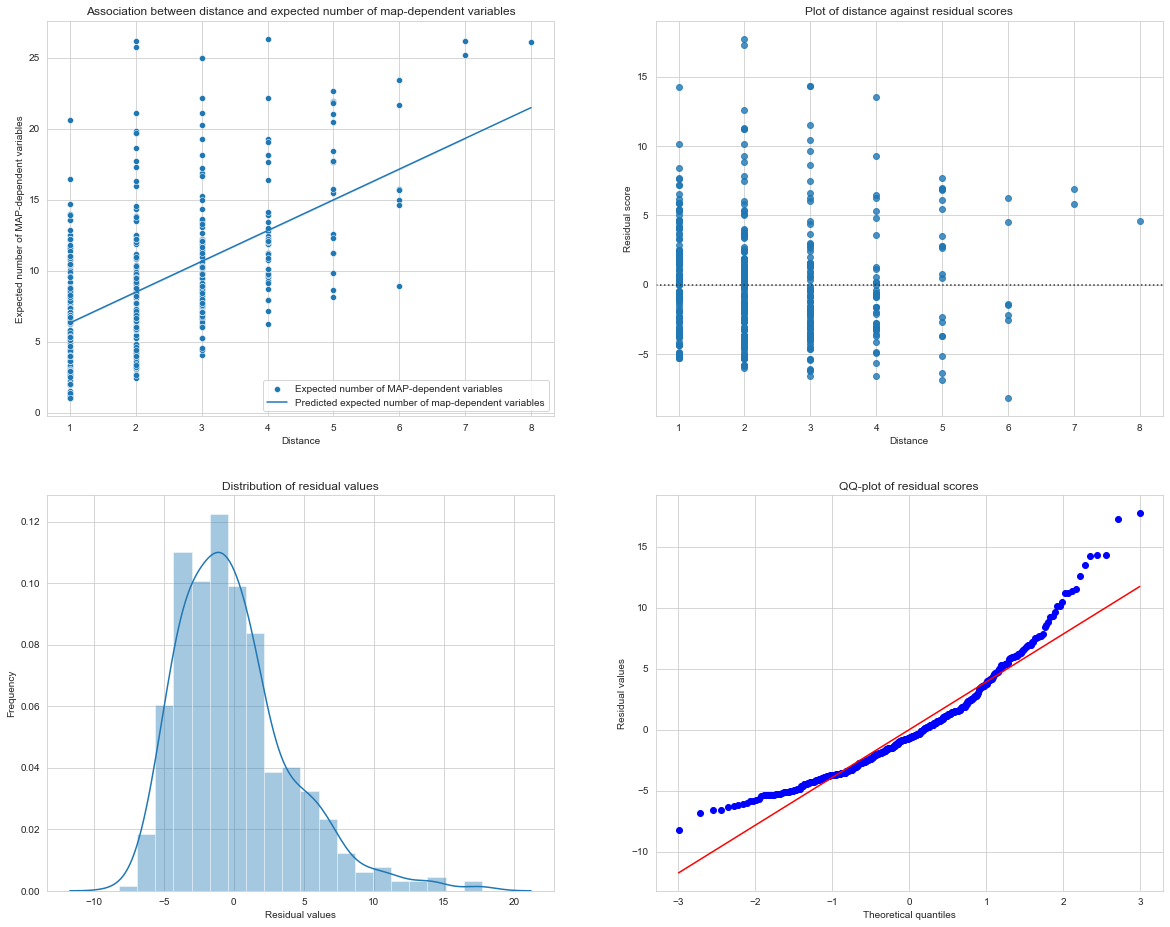

The Pearson correlation between the expected number of MAP-dependent variables and Distance : (0.5486952579587865, 1.7090003589519994e-40)
                            OLS Regression Results                            
Dep. Variable:          exp_dependent   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     300.7
Date:                Tue, 07 Jun 2022   Prob (F-statistic):           5.33e-53
Time:                        16:27:50   Log-Likelihood:                -1373.6
No. Observations:                 498   AIC:                             2751.
Df Residuals:                     496   BIC:                             2760.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025

C:\Users\simon\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\simon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


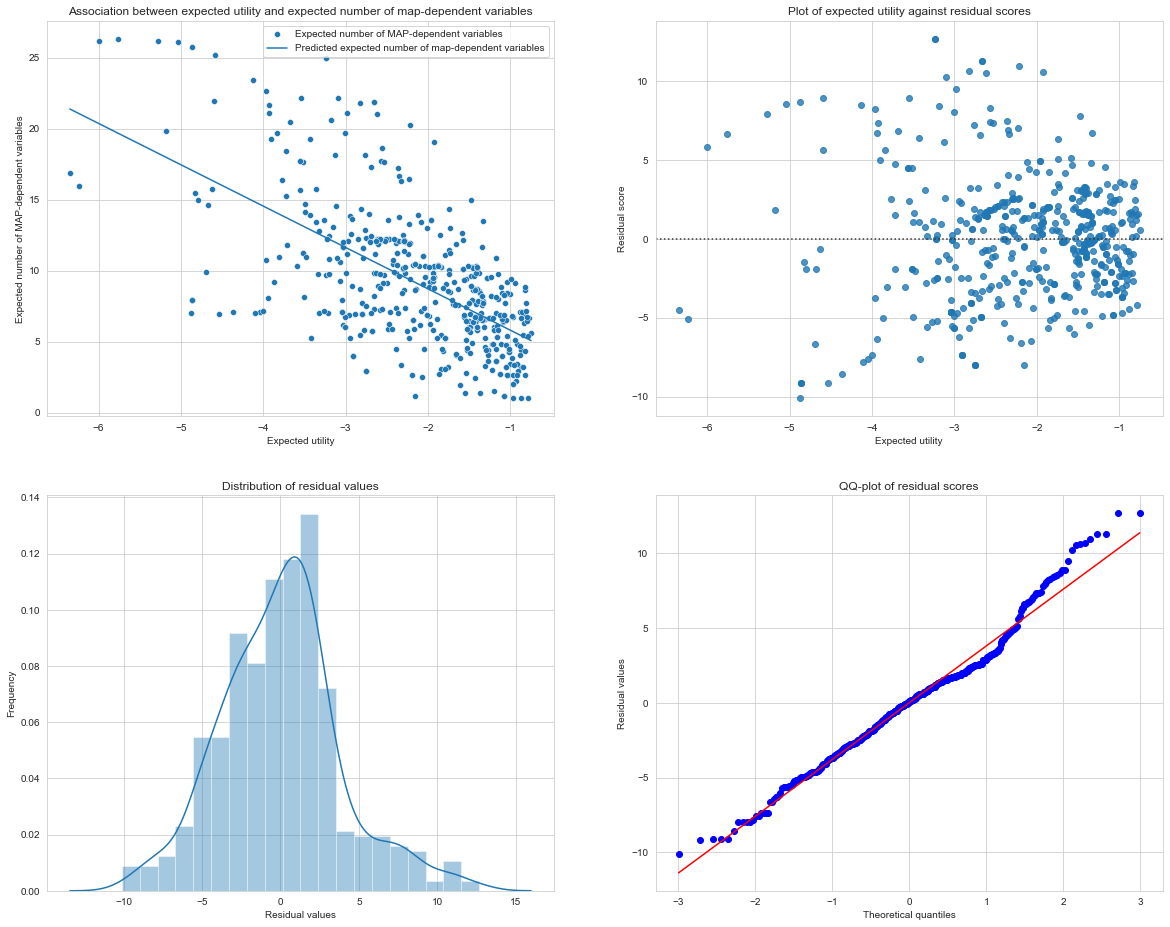

The Pearson correlation between the expected number of MAP-dependent variables and Expected utility : (-0.6143340792280554, 5.332234162997099e-53)
                            OLS Regression Results                            
Dep. Variable:          exp_dependent   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     429.2
Date:                Tue, 07 Jun 2022   Prob (F-statistic):           3.73e-69
Time:                        16:27:51   Log-Likelihood:                -1336.3
No. Observations:                 498   AIC:                             2677.
Df Residuals:                     496   BIC:                             2685.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [

C:\Users\simon\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\simon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


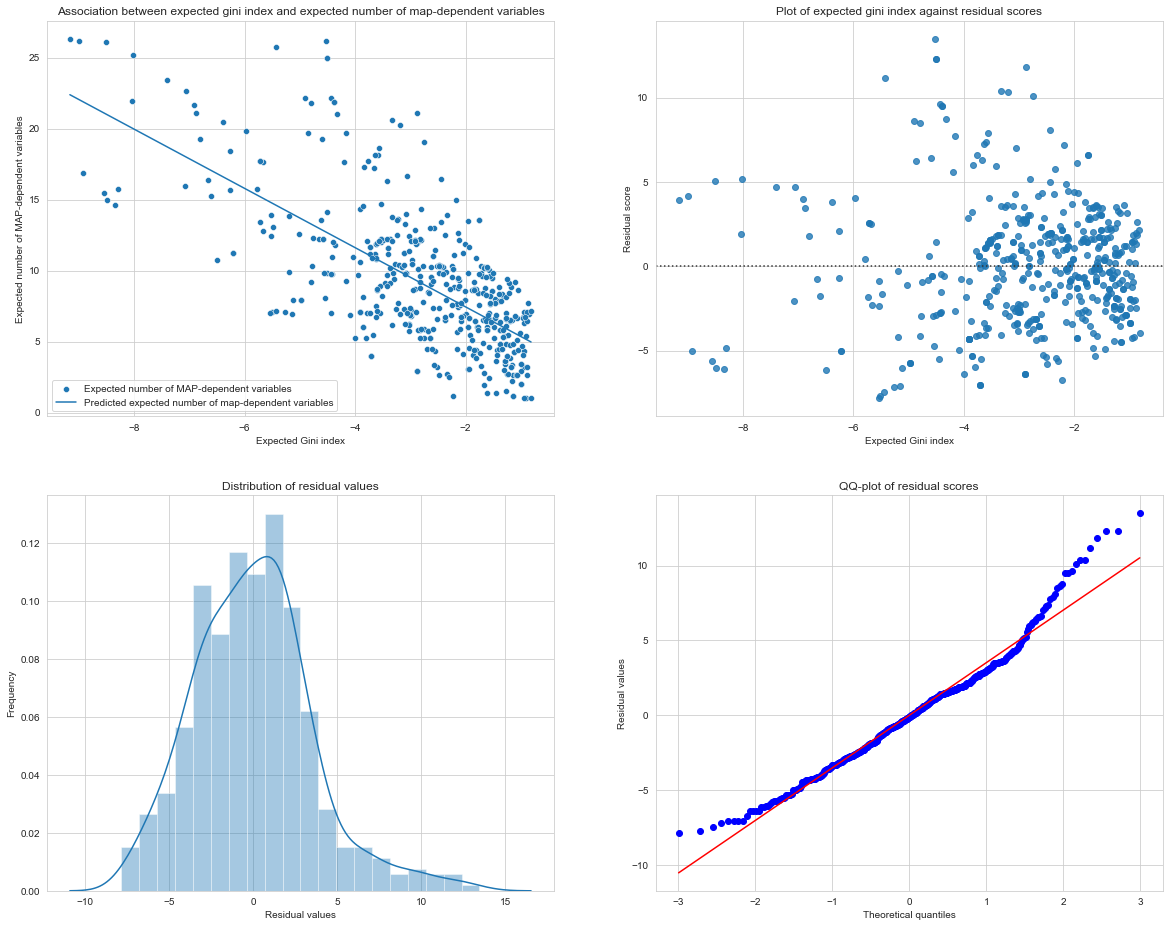

The Pearson correlation between the expected number of MAP-dependent variables and Expected Gini index : (-0.6811065599680406, 3.728109444452037e-69)
                            OLS Regression Results                            
Dep. Variable:          exp_dependent   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     402.0
Date:                Tue, 07 Jun 2022   Prob (F-statistic):           1.21e-65
Time:                        16:27:52   Log-Likelihood:                -1316.6
No. Observations:                 489   AIC:                             2637.
Df Residuals:                     487   BIC:                             2646.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t| 

C:\Users\simon\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\simon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


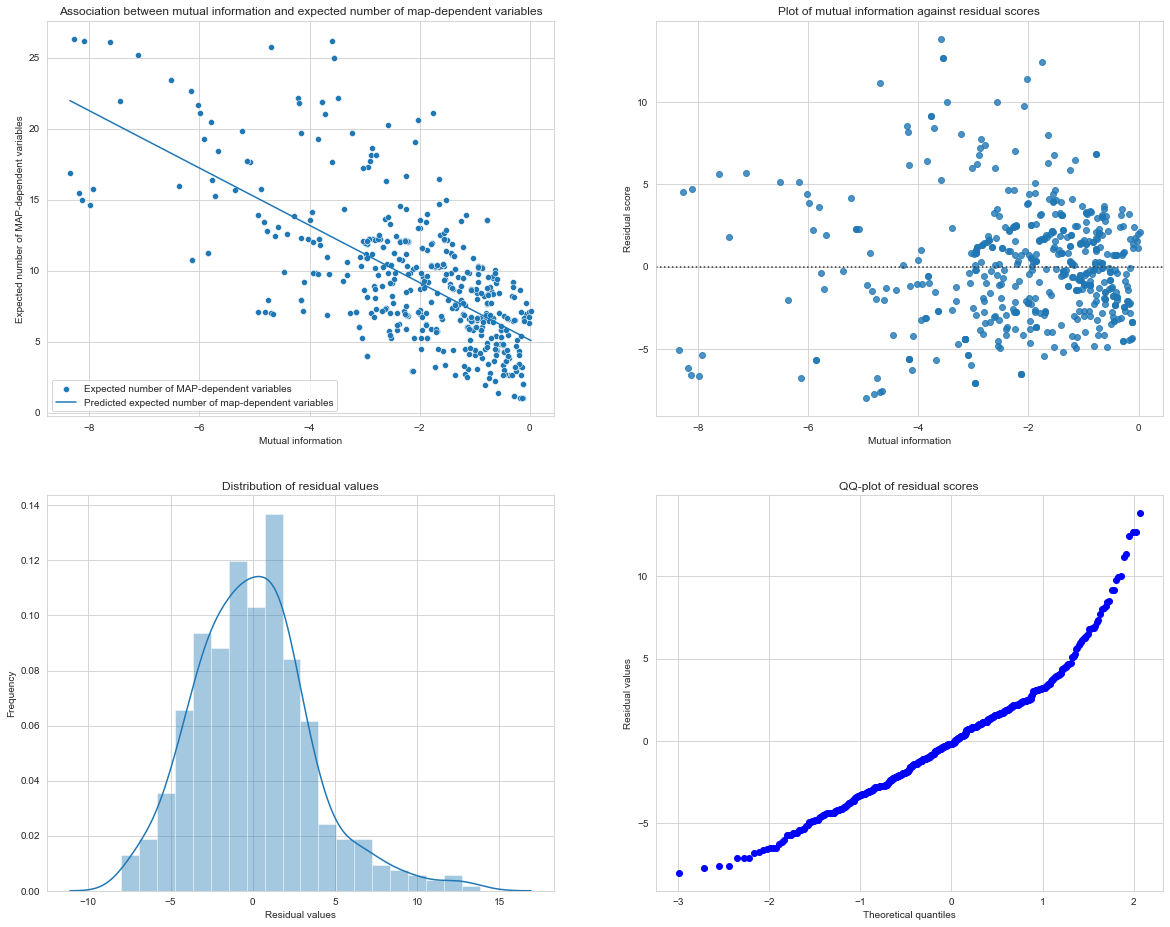

The Pearson correlation between the expected number of MAP-dependent variables and Mutual information : (-0.6667094030213967, 2.572358098637441e-65)


In [23]:
# Check the assumptions for using linear regression and show the regression model statistics for each test-selection strategy
for i, h in enumerate(adapted_strategies):
    showAssumptions('exp_dependent', h, data_dependent_larger_than_6, 'Expected number of MAP-dependent variables', strategy_names[i])
    # Print the correlation between the expected number of MAP-dependent variables and the test-selection strategy values
    print("The Pearson correlation between the expected number of MAP-dependent variables and {} : {}".format(strategy_names[i], stats.pearsonr(data_dependent_larger_than_6['exp_dependent'], data_dependent_larger_than_6[h].fillna(data[h].mean()))))